<a href="https://colab.research.google.com/github/Raju2004-chenchu/SML/blob/main/sml_project__1_2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
df = pd.read_csv("/content/App Rating 4.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [ ]:
CategoryString = df["Category"]
categoryVal = df["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
df["Category"] = df["Category"].map(category_dict).astype(int)

In [ ]:
def change_size(size):
    if isinstance(size, str):
        if 'M' in size:
            x = size[:-1]
            x = float(x) * 1000000
            return (x)
        elif 'k' == size[-1:]:
            x = size[:-1]
            x = float(x) * 1000
            return (x)
    return size

df["Size"] = df["Size"].map(change_size)
df.Size.fillna(method='ffill', inplace=True)

<ipython-input-8-7e2e4940b703>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Size.fillna(method='ffill', inplace=True)
<ipython-input-8-7e2e4940b703>:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.Size.fillna(method='ffill', inplace=True)


In [ ]:
df['Installs'] = [int(i[:-1].replace(',','')) for i in df['Installs']]

In [ ]:
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df['Type'] = df['Type'].map(type_cat)

In [ ]:
RatingL = df['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df['Content Rating'] = df['Content Rating'].map(RatingDict).astype(int)

In [ ]:
df.drop(labels = ['Last Updated','Current Ver','Android Ver','App','Genres','Installs','Price',], axis = 1, inplace = True)

In [ ]:
df['Reviews'] = df['Reviews'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   int64  
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   int64  
 3   Size            9360 non-null   object 
 4   Type            9360 non-null   int64  
 5   Content Rating  9360 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 769.9+ KB


In [ ]:
df.head()

,Category,Rating,Reviews,Size,Type,Content Rating
0,0,4.1,159,19000000.0,0,0
1,0,3.9,967,14000000.0,0,0
2,0,4.7,87510,8700000.0,0,0
3,0,4.5,215644,25000000.0,0,1
4,0,4.3,967,2800000.0,0,0


In [ ]:
df.shape

(9360, 6)

In [ ]:
y=df["Rating"]
print(y)

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9360, dtype: float64


In [ ]:
x=df.drop("Rating",axis=1)
print(x)

       Category  Reviews        Size  Type  Content Rating
0             0      159  19000000.0     0               0
1             0      967  14000000.0     0               0
2             0    87510   8700000.0     0               0
3             0   215644  25000000.0     0               1
4             0      967   2800000.0     0               0
...         ...      ...         ...   ...             ...
10834        18        7   2600000.0     0               0
10836        18       38  53000000.0     0               0
10837        18        4   3600000.0     0               0
10839         3      114           3     0               3
10840        16   398307  19000000.0     0               0

[9360 rows x 5 columns]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2)

In [ ]:
x_train = train.iloc[:, :20].values
x_test = test.iloc[:, :20].values

In [ ]:
y_train = train['Rating'].values
y_test = test['Rating'].values

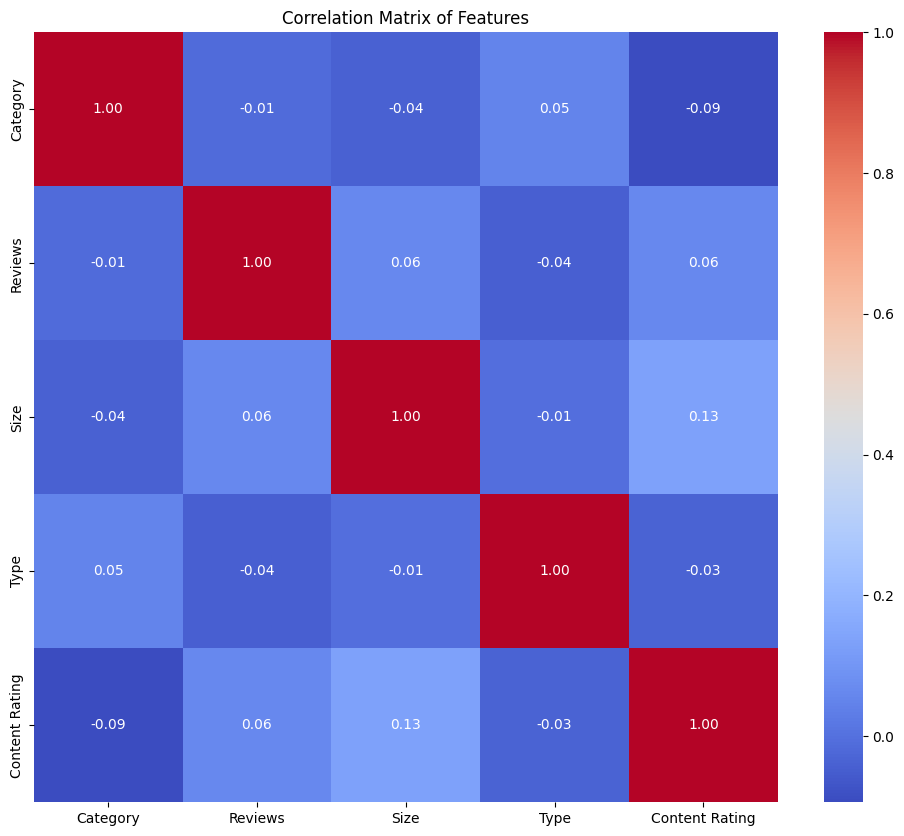

,Category,Reviews,Size,Type,Content Rating
Category,1.000000,-0.013501,-0.041046,0.049092,-0.094025
Reviews,-0.013501,1.000000,0.062281,-0.043244,0.060929
Size,-0.041046,0.062281,1.000000,-0.005678,0.133331
Type,0.049092,-0.043244,-0.005678,1.000000,-0.034392
Content Rating,-0.094025,0.060929,0.133331,-0.034392,1.000000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
correlation_matrix = x.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

correlation_matrix

LINEAR REGRESSION

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
model_lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_train_predict = model_lr.predict(x_train)
y_test_predict = model_lr.predict(x_test)

print(f'train data MSE score: {mean_squared_error(y_train, y_train_predict)}')
print(f'train data MAE score: {mean_absolute_error(y_train, y_train_predict)}')
print(f'train data RMSE score: {np.sqrt(mean_squared_error(y_train, y_train_predict))}')
print()
print(f'test data MSE score: {mean_squared_error(y_test, y_test_predict)}')
print(f'test data MAE score: {mean_absolute_error(y_test, y_test_predict)}')
print(f'test data RMSE score: {np.sqrt(mean_squared_error(y_test, y_test_predict))}')

train data MSE score: 1.3612270132054588e-20
train data MAE score: 6.871096168888553e-11
train data RMSE score: 1.1667163379354293e-10

test data MSE score: 1.0007736121037707e-20
test data MAE score: 6.471118761924143e-11
test data RMSE score: 1.0003867312713473e-10


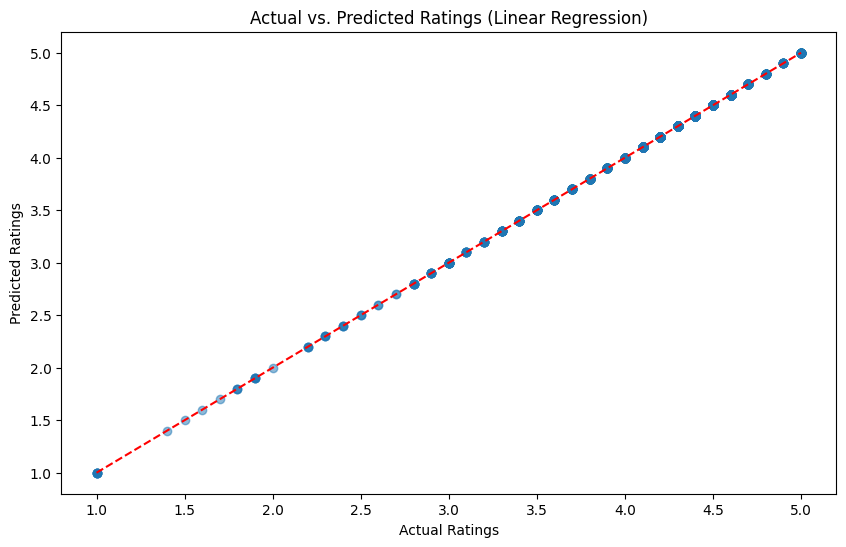

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_predict, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Ratings (Linear Regression)")
plt.show()

In [ ]:
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression

n_iterations = 100

train_mse_scores = []
train_mae_scores = []
train_rmse_scores = []
test_mse_scores = []
test_mae_scores = []
test_rmse_scores = []


def root_mean_squared_error(y_true, y_pred):
    """
    Calculate the root mean squared error (RMSE).

    Args:
        y_true: The true values.
        y_pred: The predicted values.

    Returns:
        The RMSE.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse


for _ in range(n_iterations):
    x_train_boot, y_train_boot = resample(x_train, y_train, replace=True)

    model_lr = LinearRegression()
    model_lr.fit(x_train_boot, y_train_boot)
    y_train_predict = model_lr.predict(x_train_boot)
    y_test_predict = model_lr.predict(x_test)

    train_mse_scores.append(mean_squared_error(y_train_boot, y_train_predict))
    train_mae_scores.append(mean_absolute_error(y_train_boot, y_train_predict))
    train_rmse_scores.append(
        root_mean_squared_error(y_train_boot, y_train_predict)
    )
    test_mse_scores.append(mean_squared_error(y_test, y_test_predict))
    test_mae_scores.append(mean_absolute_error(y_test, y_test_predict))
    test_rmse_scores.append(root_mean_squared_error(y_test, y_test_predict))

print(f"Average Train MSE: {np.mean(train_mse_scores)}")
print(f"Average Train MAE: {np.mean(train_mae_scores)}")
print(f"Average Train RMSE: {np.mean(train_rmse_scores)}")
print()
print(f"Average Test MSE: {np.mean(test_mse_scores)}")
print(f"Average Test MAE: {np.mean(test_mae_scores)}")
print(f"Average Test RMSE: {np.mean(test_rmse_scores)}")

Average Train MSE: 6.264691335126819e-18
Average Train MAE: 1.4669310943244183e-09
Average Train RMSE: 1.938010791058946e-09

Average Test MSE: 6.555460656408936e-18
Average Test MAE: 1.4976232788070037e-09
Average Test RMSE: 1.9722111953251145e-09


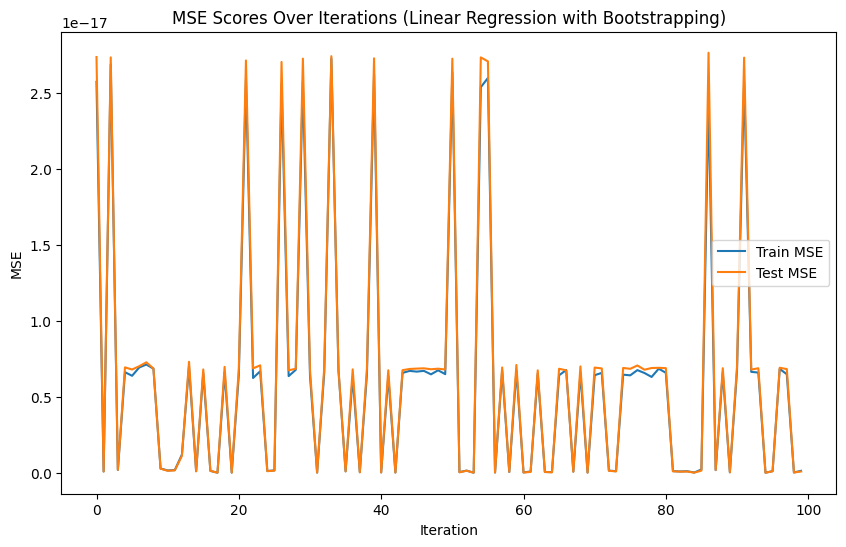

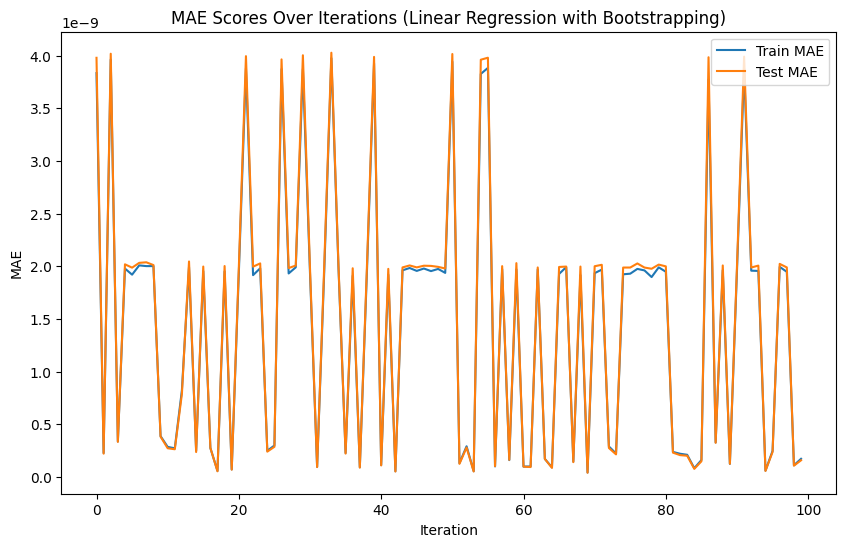

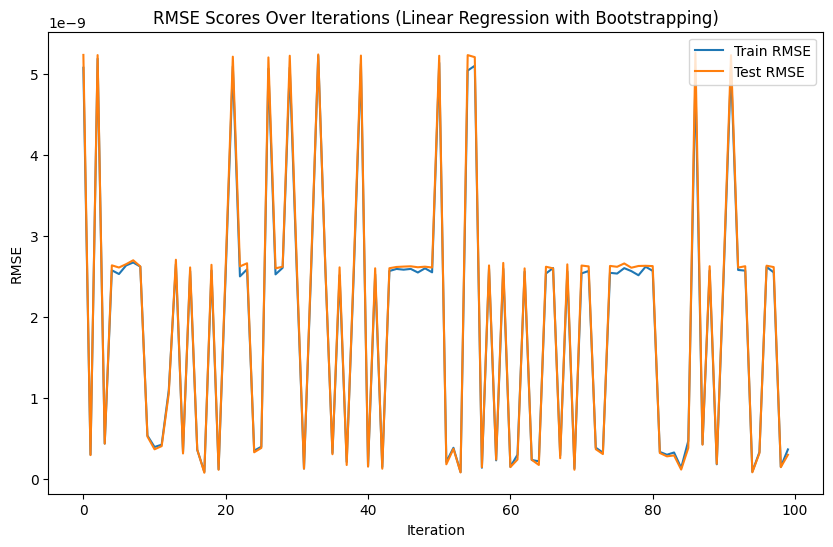

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), train_mse_scores, label='Train MSE')
plt.plot(range(n_iterations), test_mse_scores, label='Test MSE')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE Scores Over Iterations (Linear Regression with Bootstrapping)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), train_mae_scores, label='Train MAE')
plt.plot(range(n_iterations), test_mae_scores, label='Test MAE')
plt.xlabel('Iteration')
plt.ylabel('MAE')
plt.title('MAE Scores Over Iterations (Linear Regression with Bootstrapping)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), train_rmse_scores, label='Train RMSE')
plt.plot(range(n_iterations), test_rmse_scores, label='Test RMSE')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('RMSE Scores Over Iterations (Linear Regression with Bootstrapping)')
plt.legend()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
pca = PCA(n_components=5)
x_pca = pca.fit_transform(x_scaled)
x_train_pca, x_test_pca, y_train, y_test = train_test_split(
    x_pca, y, test_size=0.2, random_state=42
)

model_lr = LinearRegression()
model_lr.fit(x_train_pca, y_train)
y_pred_train = model_lr.predict(x_train_pca)
y_pred_test = model_lr.predict(x_test_pca)

def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

print(f'train data MSE score: {mean_squared_error(y_train, y_pred_train)}')
print(f'train data MAE score: {mean_absolute_error(y_train, y_pred_train)}')
print(f'train data RMSE score: {root_mean_squared_error(y_train, y_pred_train)}')
print()
print(f'test data MSE score: {mean_squared_error(y_test, y_pred_test)}')
print(f'test data MAE score: {mean_absolute_error(y_test, y_pred_test)}')
print(f'test data RMSE score: {root_mean_squared_error(y_test, y_pred_test)}')

train data MSE score: 0.2647222546816425
train data MAE score: 0.36075579384084644
train data RMSE score: 0.5145116662250162

test data MSE score: 0.2565843923440515
test data MAE score: 0.35121595551947765
test data RMSE score: 0.5065415998159001


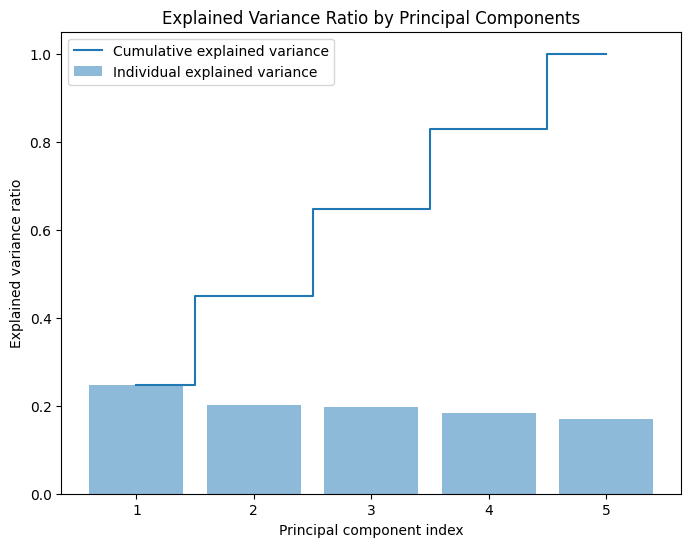

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

SVM

In [ ]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(x_train, y_train)

SVR()

In [ ]:
y_pred_train = model_svr.predict(x_train)
y_pred_test= model_svr.predict(x_test)

print(f'train data MSE score SVR: {mean_squared_error(y_train,y_pred_train )}')
print(f'train data MAE score SVR: {mean_absolute_error(y_train, y_pred_train)}')
print(f'train data RMSE score SVR: {root_mean_squared_error(y_train,y_pred_train )}')



print()
print(f'test data MSE score SVR: {mean_squared_error(y_test, y_pred_test)}')
print(f'test data MAE score SVR: {mean_absolute_error(y_test, y_pred_test)}')
print(f'test data RMSE score SVR: {root_mean_squared_error(y_test, y_pred_test)}')
print()

train data MSE score SVR: 0.27802165133281215
train data MAE score SVR: 0.35005130633240283
train data RMSE score SVR: 0.5272775847054492

test data MSE score SVR: 0.2707442969025281
test data MAE score SVR: 0.34332203789223453
test data RMSE score SVR: 0.5203309493990609



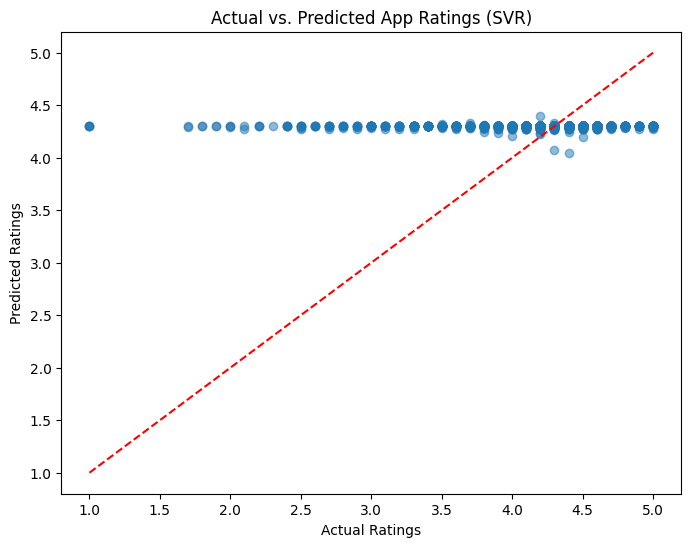

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted App Ratings (SVR)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line
plt.show()

In [ ]:
from sklearn.utils import resample
from sklearn.svm import SVR

n_iterations = 100

train_mse_scores = []
train_mae_scores = []
train_rmse_scores = []
test_mse_scores = []
test_mae_scores = []
test_rmse_scores = []


def root_mean_squared_error(y_true, y_pred):
    """
    Calculate the root mean squared error (RMSE).

    Args:
        y_true: The true values.
        y_pred: The predicted values.

    Returns:
        The RMSE.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse


for _ in range(n_iterations):

    x_train_boot, y_train_boot = resample(x_train, y_train, replace=True)

    model_svr = SVR()
    model_svr.fit(x_train_boot, y_train_boot)

    y_train_predict = model_svr.predict(x_train_boot)
    y_test_predict = model_svr.predict(x_test)

    train_mse_scores.append(mean_squared_error(y_train_boot, y_train_predict))
    train_mae_scores.append(mean_absolute_error(y_train_boot, y_train_predict))
    train_rmse_scores.append(
        root_mean_squared_error(y_train_boot, y_train_predict)
    )
    test_mse_scores.append(mean_squared_error(y_test, y_test_predict))
    test_mae_scores.append(mean_absolute_error(y_test, y_test_predict))
    test_rmse_scores.append(root_mean_squared_error(y_test, y_test_predict))

print(f"Average Train MSE: {np.mean(train_mse_scores)}")
print(f"Average Train MAE: {np.mean(train_mae_scores)}")
print(f"Average Train RMSE: {np.mean(train_rmse_scores)}")
print()
print(f"Average Test MSE: {np.mean(test_mse_scores)}")
print(f"Average Test MAE: {np.mean(test_mae_scores)}")
print(f"Average Test RMSE: {np.mean(test_rmse_scores)}")

Average Train MSE: 0.27884612651811774
Average Train MAE: 0.35054122918480446
Average Train RMSE: 0.5279694853422557

Average Test MSE: 0.27040752957685554
Average Test MAE: 0.3435000592758463
Average Test RMSE: 0.5200065063333088


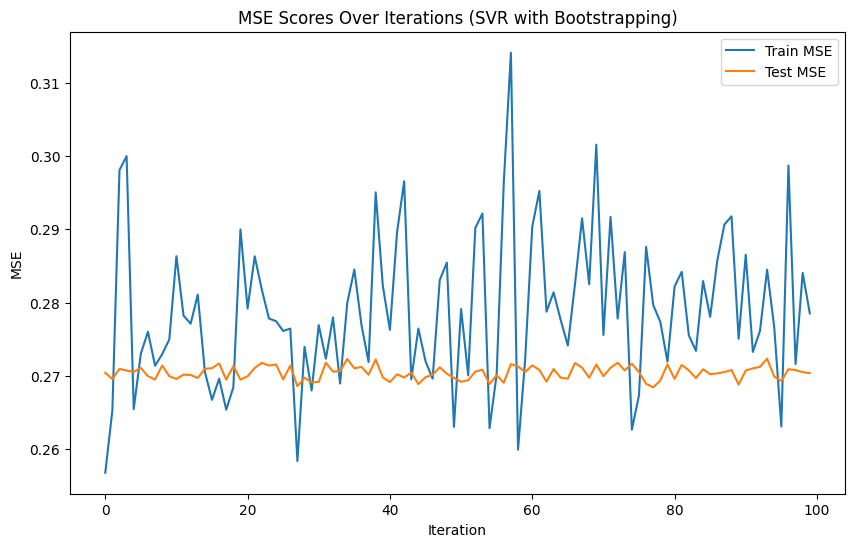

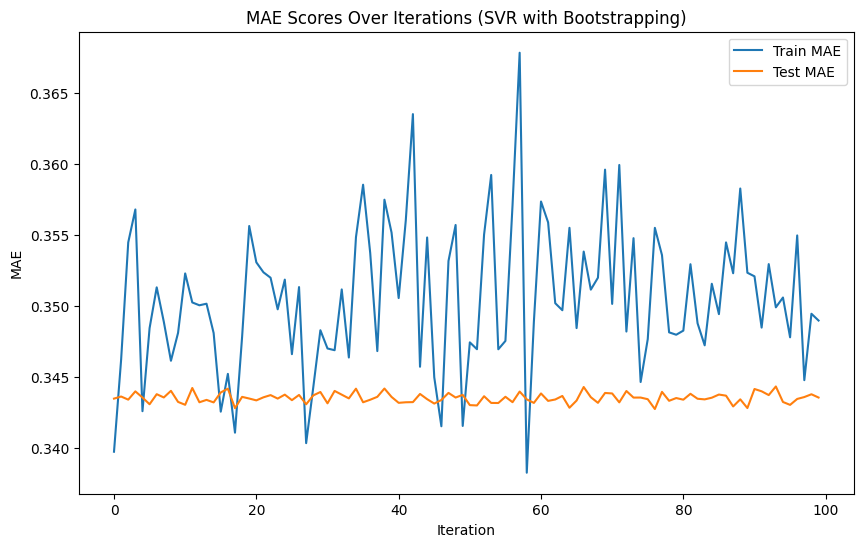

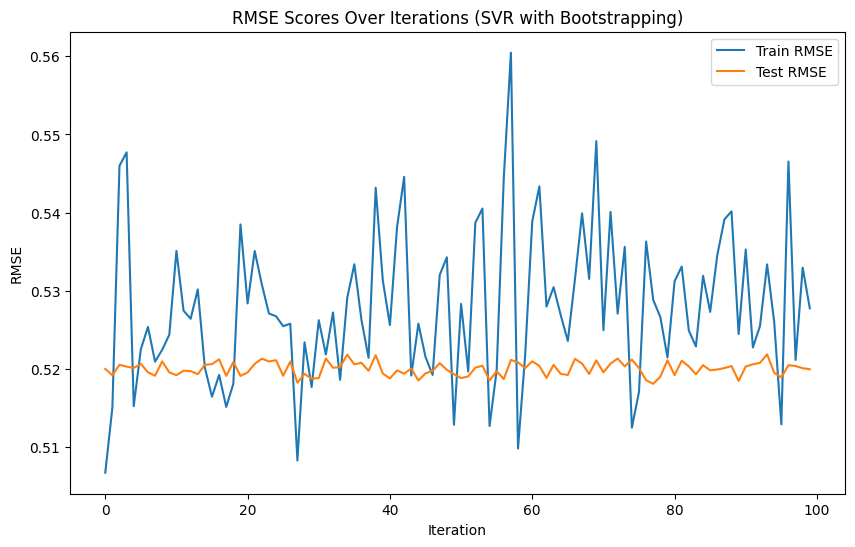

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), train_mse_scores, label='Train MSE')
plt.plot(range(n_iterations), test_mse_scores, label='Test MSE')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE Scores Over Iterations (SVR with Bootstrapping)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), train_mae_scores, label='Train MAE')
plt.plot(range(n_iterations), test_mae_scores, label='Test MAE')
plt.xlabel('Iteration')
plt.ylabel('MAE')
plt.title('MAE Scores Over Iterations (SVR with Bootstrapping)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), train_rmse_scores, label='Train RMSE')
plt.plot(range(n_iterations), test_rmse_scores, label='Test RMSE')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('RMSE Scores Over Iterations (SVR with Bootstrapping)')
plt.legend()
plt.show()

In [ ]:
!pip install scikit-learn
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
pca = PCA(n_components=4)
x_pca = pca.fit_transform(x_scaled)
x_train_pca, x_test_pca, y_train, y_test = train_test_split(
    x_pca, y, test_size=0.2, random_state=42
)

model_svr = SVR(kernel='rbf')
model_svr.fit(x_train_pca, y_train)

y_pred_train = model_svr.predict(x_train_pca)
y_pred_test = model_svr.predict(x_test_pca)
def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

print(f'train data MSE score: {mean_squared_error(y_train, y_pred_train)}')
print(f'train data MAE score: {mean_absolute_error(y_train, y_pred_train)}')
print(f'train data RMSE score: {root_mean_squared_error(y_train, y_pred_train)}')
print()
print(f'test data MSE score: {mean_squared_error(y_test, y_pred_test)}')
print(f'test data MAE score: {mean_absolute_error(y_test, y_pred_test)}')
print(f'test data RMSE score: {root_mean_squared_error(y_test, y_pred_test)}')

train data MSE score: 0.2624065259454969
train data MAE score: 0.3389230985500278
train data RMSE score: 0.5122563088391366

test data MSE score: 0.2571708174621315
test data MAE score: 0.3354233039967553
test data RMSE score: 0.5071201213343162


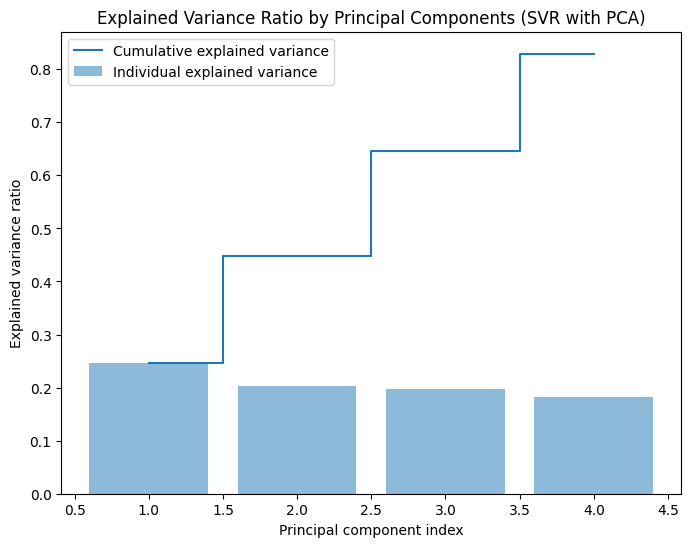

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Explained Variance Ratio by Principal Components (SVR with PCA)')
plt.show()

LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(alpha=1.0)
model_lasso.fit(x_train, y_train)

Lasso()

In [ ]:

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train, y_train)


y_pred_lasso = model_lasso.predict(x_test)
y_pred_ridge = model_ridge.predict(x_test)

y_pred_lasso1 = model_lasso.predict(x_train)
y_pred_ridge1 = model_ridge.predict(x_train)

print(f'test data MSE score lasso: {mean_squared_error(y_test,y_pred_lasso)}')
print(f'test data MAE score lasso: {mean_absolute_error(y_test, y_pred_lasso)}')
print(f'test data RMSE score lasso: {root_mean_squared_error(y_test, y_pred_lasso)}')
print()
print(f'train data MSE score lasso: {mean_squared_error(y_train,y_pred_lasso1)}')
print(f'train data MAE score lasso: {mean_absolute_error(y_train,y_pred_lasso1 )}')
print(f'train data RMSE score lasso: {root_mean_squared_error(y_train,y_pred_lasso1)}')
print()

test data MSE score lasso: 0.2583860108310277
test data MAE score lasso: 0.35202297818797124
test data RMSE score lasso: 0.5083168409870242

train data MSE score lasso: 0.267226104457274
train data MAE score lasso: 0.36272847118379686
train data RMSE score lasso: 0.5169391690105075



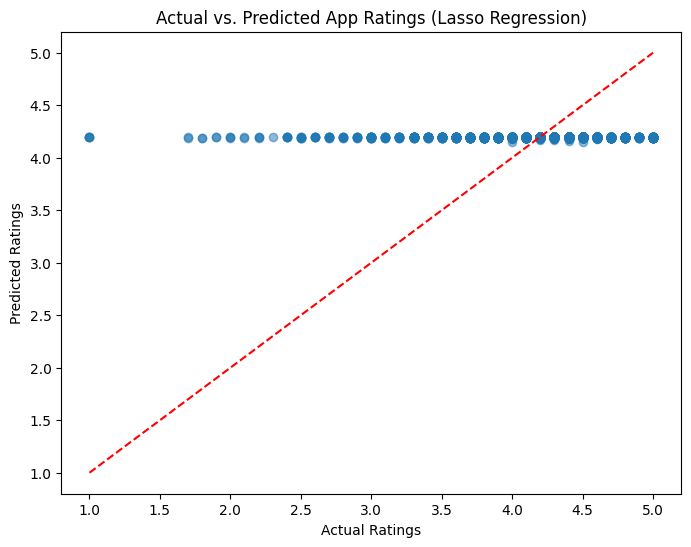

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted App Ratings (Lasso Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

In [ ]:
from sklearn.utils import resample
from sklearn.linear_model import Lasso

n_iterations = 100

train_mse_scores = []
train_mae_scores = []
train_rmse_scores = []
test_mse_scores = []
test_mae_scores = []
test_rmse_scores = []


def root_mean_squared_error(y_true, y_pred):
    """
    Calculate the root mean squared error (RMSE).

    Args:
        y_true: The true values.
        y_pred: The predicted values.

    Returns:
        The RMSE.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse


for _ in range(n_iterations):
    x_train_boot, y_train_boot = resample(x_train, y_train, replace=True)

    model_lasso = Lasso(alpha=1.0)
    model_lasso.fit(x_train_boot, y_train_boot)

    y_train_predict = model_lasso.predict(x_train_boot)
    y_test_predict = model_lasso.predict(x_test)

    train_mse_scores.append(mean_squared_error(y_train_boot, y_train_predict))
    train_mae_scores.append(mean_absolute_error(y_train_boot, y_train_predict))
    train_rmse_scores.append(
        root_mean_squared_error(y_train_boot, y_train_predict)
    )
    test_mse_scores.append(mean_squared_error(y_test, y_test_predict))
    test_mae_scores.append(mean_absolute_error(y_test, y_test_predict))
    test_rmse_scores.append(root_mean_squared_error(y_test, y_test_predict))

print(f"Average Train MSE: {np.mean(train_mse_scores)}")
print(f"Average Train MAE: {np.mean(train_mae_scores)}")
print(f"Average Train RMSE: {np.mean(train_rmse_scores)}")
print()
print(f"Average Test MSE: {np.mean(test_mse_scores)}")
print(f"Average Test MAE: {np.mean(test_mae_scores)}")
print(f"Average Test RMSE: {np.mean(test_rmse_scores)}")

Average Train MSE: 0.267091302199189
Average Train MAE: 0.3625180777695627
Average Train RMSE: 0.5167403774560649

Average Test MSE: 0.2584701683610758
Average Test MAE: 0.3523045727142162
Average Test RMSE: 0.508399596429064


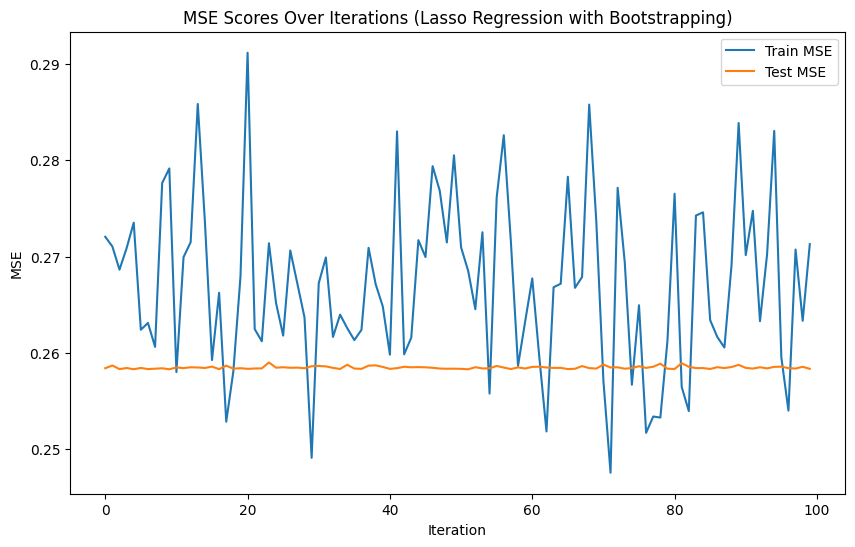

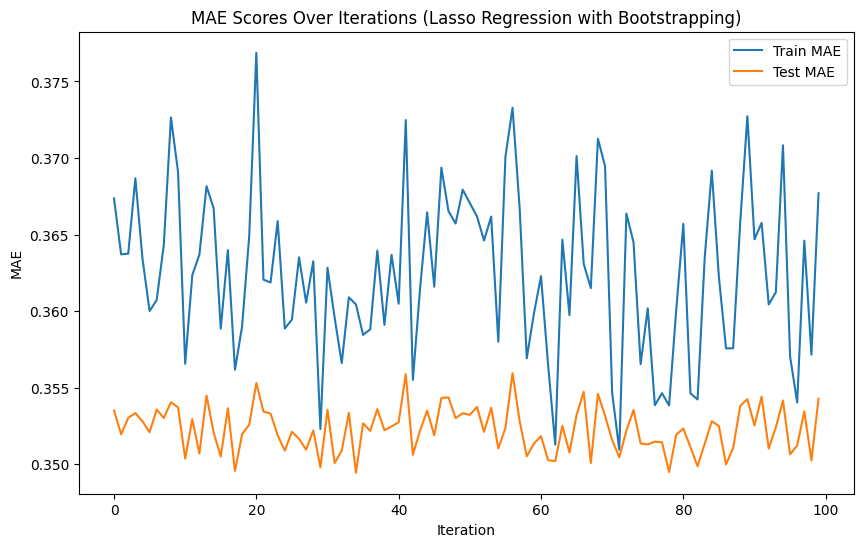

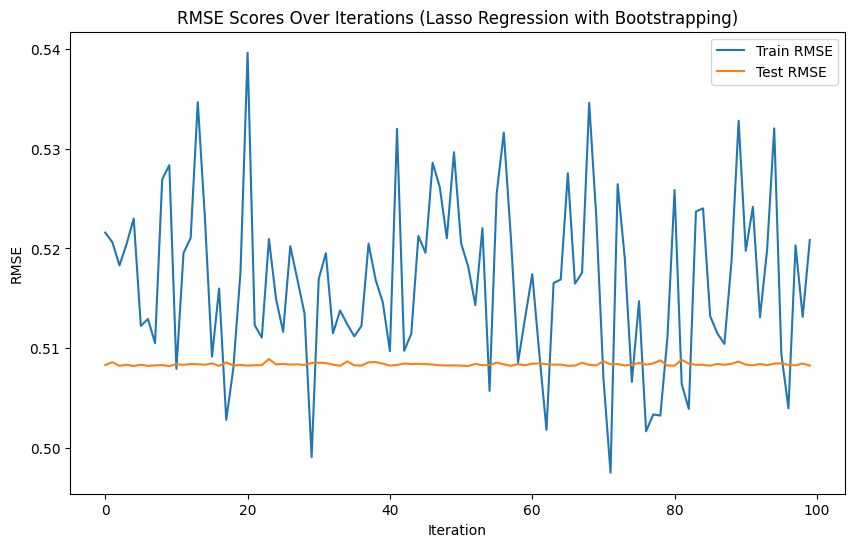

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), train_mse_scores, label='Train MSE')
plt.plot(range(n_iterations), test_mse_scores, label='Test MSE')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE Scores Over Iterations (Lasso Regression with Bootstrapping)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), train_mae_scores, label='Train MAE')
plt.plot(range(n_iterations), test_mae_scores, label='Test MAE')
plt.xlabel('Iteration')
plt.ylabel('MAE')
plt.title('MAE Scores Over Iterations (Lasso Regression with Bootstrapping)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), train_rmse_scores, label='Train RMSE')
plt.plot(range(n_iterations), test_rmse_scores, label='Test RMSE')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('RMSE Scores Over Iterations (Lasso Regression with Bootstrapping)')
plt.legend()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
pca = PCA(n_components=4)
x_pca = pca.fit_transform(x_scaled)
x_train_pca, x_test_pca, y_train, y_test = train_test_split(
    x_pca, y, test_size=0.2, random_state=42
)

model_lasso = Lasso(alpha=1.0)
model_lasso.fit(x_train_pca, y_train)

y_pred_train = model_lasso.predict(x_train_pca)
y_pred_test = model_lasso.predict(x_test_pca)

def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

print(f'train data MSE score: {mean_squared_error(y_train, y_pred_train)}')
print(f'train data MAE score: {mean_absolute_error(y_train, y_pred_train)}')
print(f'train data RMSE score: {root_mean_squared_error(y_train, y_pred_train)}')
print()
print(f'test data MSE score: {mean_squared_error(y_test, y_pred_test)}')
print(f'test data MAE score: {mean_absolute_error(y_test, y_pred_test)}')
print(f'test data RMSE score: {root_mean_squared_error(y_test, y_pred_test)}')

train data MSE score: 0.2672354568948494
train data MAE score: 0.3627449075215501
train data RMSE score: 0.516948214906338

test data MSE score: 0.25840231139766645
test data MAE score: 0.3520293866197311
test data RMSE score: 0.5083328745985907


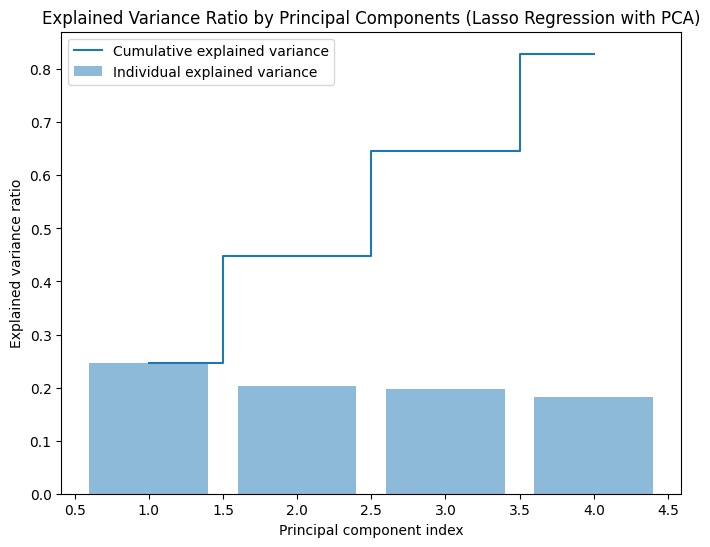

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Explained Variance Ratio by Principal Components (Lasso Regression with PCA)')
plt.show()

RIDGE REGRESSION

In [ ]:
from sklearn.linear_model import Lasso, Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train, y_train)

Ridge()

In [ ]:
print(f'train data MSE score ridge: {mean_squared_error(y_train,y_pred_ridge1)}')
print(f'train data MAE score ridge: {mean_absolute_error(y_train,y_pred_ridge1 )}')
print(f'train data RMSE score ridge: {root_mean_squared_error(y_train,y_pred_ridge1)}')
print()
print(f'test data MSE score ridge: {mean_squared_error(y_test,y_pred_ridge)}')
print(f'test data MAE score ridge: {mean_absolute_error(y_test,y_pred_ridge )}')
print(f'test data RMSE score ridge: {root_mean_squared_error(y_test,y_pred_ridge)}')
print()

train data MSE score ridge: 0.2669745325058277
train data MAE score ridge: 0.36317593636839496
train data RMSE score ridge: 0.5166957833249926

test data MSE score ridge: 0.2578472189738361
test data MAE score ridge: 0.3521665936185202
test data RMSE score ridge: 0.50778658802083



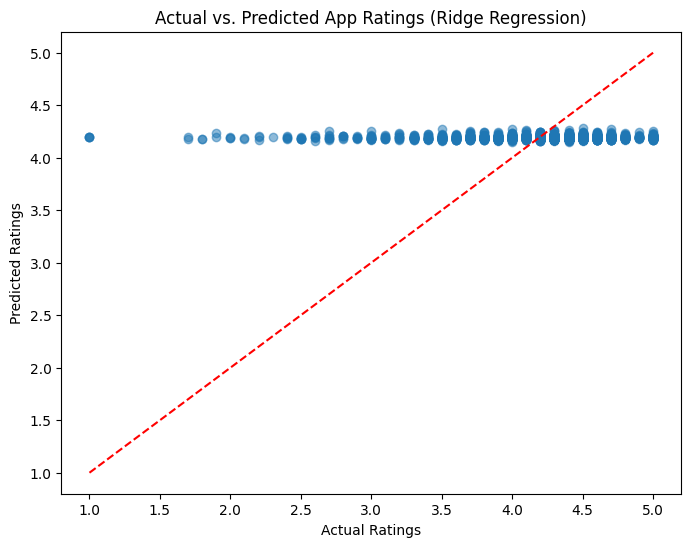

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted App Ratings (Ridge Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.linear_model import Ridge

n_iterations = 100

train_mse_scores = []
train_mae_scores = []
train_rmse_scores = []
test_mse_scores = []
test_mae_scores = []
test_rmse_scores = []


def root_mean_squared_error(y_true, y_pred):
    """
    Calculate the root mean squared error (RMSE).

    Args:
        y_true: The true values.
        y_pred: The predicted values.

    Returns:
        The RMSE.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse


for _ in range(n_iterations):

    x_train_boot, y_train_boot = resample(x_train, y_train, replace=True)

    model_ridge = Ridge(alpha=1.0)
    model_ridge.fit(x_train_boot, y_train_boot)

    y_train_predict = model_ridge.predict(x_train_boot)
    y_test_predict = model_ridge.predict(x_test)

    train_mse_scores.append(mean_squared_error(y_train_boot, y_train_predict))
    train_mae_scores.append(mean_absolute_error(y_train_boot, y_train_predict))
    train_rmse_scores.append(
        root_mean_squared_error(y_train_boot, y_train_predict)
    )
    test_mse_scores.append(mean_squared_error(y_test, y_test_predict))
    test_mae_scores.append(mean_absolute_error(y_test, y_test_predict))
    test_rmse_scores.append(root_mean_squared_error(y_test, y_test_predict))

print(f"Average Train MSE: {np.mean(train_mse_scores)}")
print(f"Average Train MAE: {np.mean(train_mae_scores)}")
print(f"Average Train RMSE: {np.mean(train_rmse_scores)}")
print()
print(f"Average Test MSE: {np.mean(test_mse_scores)}")
print(f"Average Test MAE: {np.mean(test_mae_scores)}")
print(f"Average Test RMSE: {np.mean(test_rmse_scores)}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.06277e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.09225e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.10952e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08206e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Average Train MSE: 0.26506216199288934
Average Train MAE: 0.3621166062661468
Average Train RMSE: 0.5147845670880876

Average Test MSE: 0.25807701486906376
Average Test MAE: 0.35219875583073607
Average Test RMSE: 0.5080126829665147


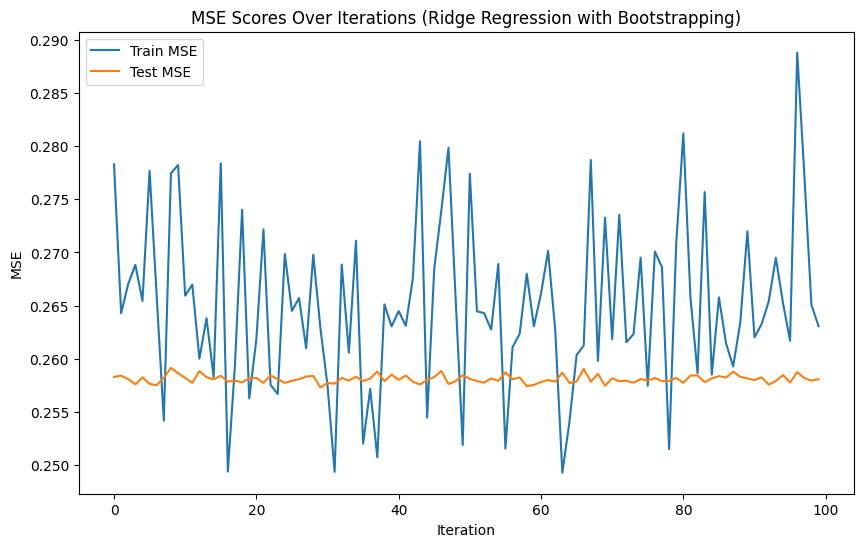

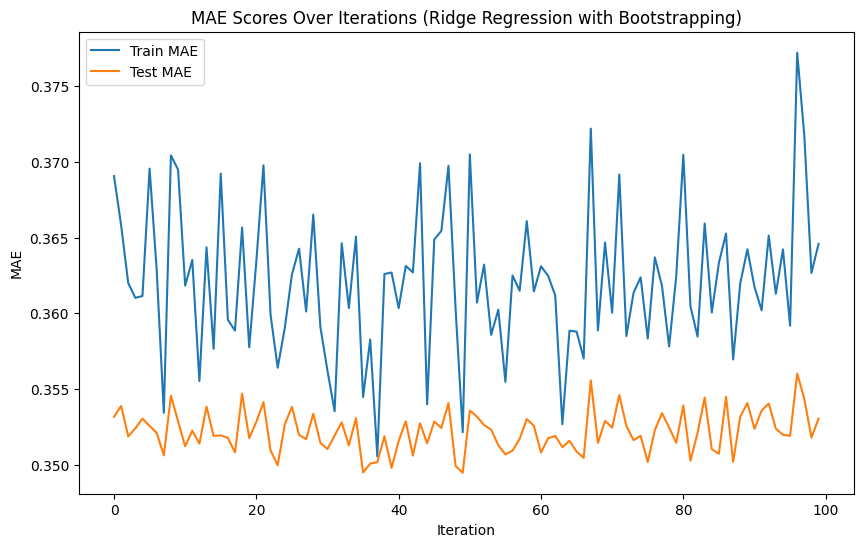

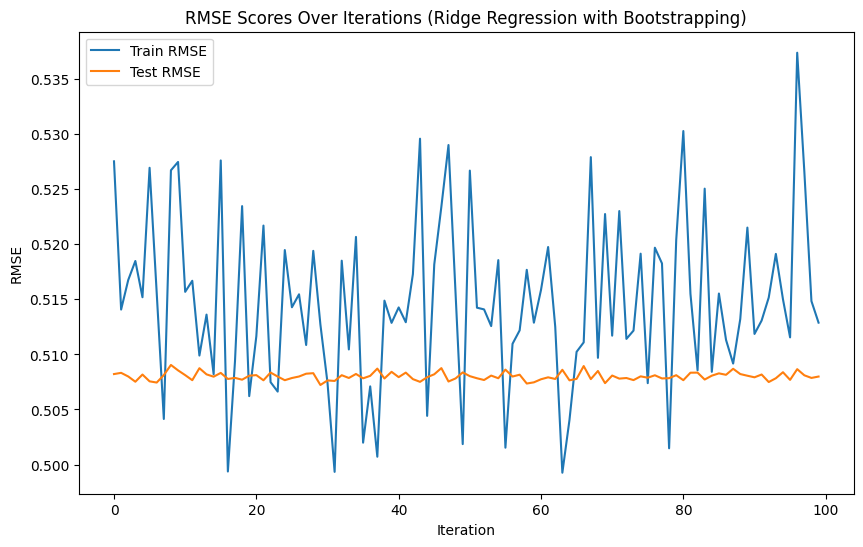

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), train_mse_scores, label='Train MSE')
plt.plot(range(n_iterations), test_mse_scores, label='Test MSE')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE Scores Over Iterations (Ridge Regression with Bootstrapping)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), train_mae_scores, label='Train MAE')
plt.plot(range(n_iterations), test_mae_scores, label='Test MAE')
plt.xlabel('Iteration')
plt.ylabel('MAE')
plt.title('MAE Scores Over Iterations (Ridge Regression with Bootstrapping)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), train_rmse_scores, label='Train RMSE')
plt.plot(range(n_iterations), test_rmse_scores, label='Test RMSE')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('RMSE Scores Over Iterations (Ridge Regression with Bootstrapping)')
plt.legend()
plt.show()

In [ ]:
!pip install scikit-learn
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
pca = PCA(n_components=4)
x_pca = pca.fit_transform(x_scaled)

x_train_pca, x_test_pca, y_train, y_test = train_test_split(
    x_pca, y, test_size=0.2, random_state=42
)

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train_pca, y_train)
y_pred_train = model_ridge.predict(x_train_pca)
y_pred_test = model_ridge.predict(x_test_pca)
def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

print(f'train data MSE score: {mean_squared_error(y_train, y_pred_train)}')
print(f'train data MAE score: {mean_absolute_error(y_train, y_pred_train)}')
print(f'train data RMSE score: {root_mean_squared_error(y_train, y_pred_train)}')
print()
print(f'test data MSE score: {mean_squared_error(y_test, y_pred_test)}')
print(f'test data MAE score: {mean_absolute_error(y_test, y_pred_test)}')
print(f'test data RMSE score: {root_mean_squared_error(y_test, y_pred_test)}')

train data MSE score: 0.26514436628970645
train data MAE score: 0.3613568920266953
train data RMSE score: 0.5149217088934068

test data MSE score: 0.25664439660587823
test data MAE score: 0.3514559861433179
test data RMSE score: 0.5066008257058788


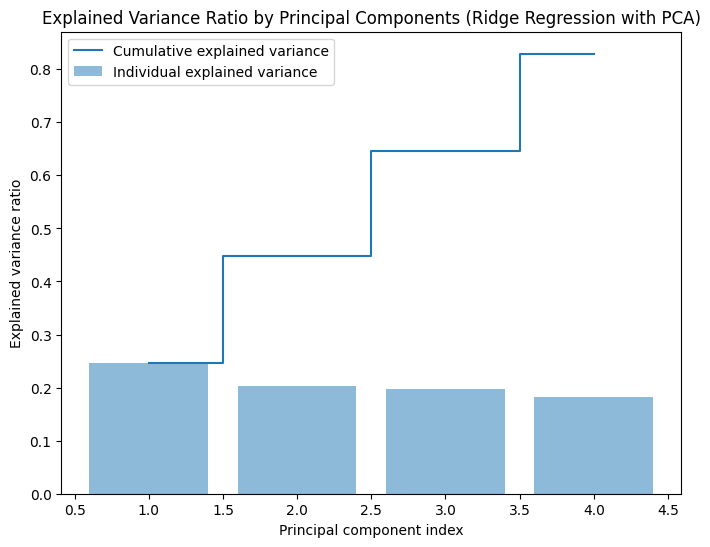

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Explained Variance Ratio by Principal Components (Ridge Regression with PCA)')
plt.show()

# KKN

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(x_train, y_train)


KNeighborsRegressor()

In [ ]:
y_train_predict = model_knn.predict(x_train)
y_test_predict = model_knn.predict(x_test)

def root_mean_squared_error(y_true, y_pred):
    """
    Calculate the root mean squared error (RMSE).

    Args:
        y_true: The true values.
        y_pred: The predicted values.

    Returns:
        The RMSE.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse


print(f'train data MSE score: {mean_squared_error(y_train, y_train_predict)}')
print(f'train data MAE score: {mean_absolute_error(y_train, y_train_predict)}')
print(f'train data RMSE score: {root_mean_squared_error(y_train, y_train_predict)}')
print()
print(f'test data MSE score: {mean_squared_error(y_test, y_test_predict)}')
print(f'test data MAE score: {mean_absolute_error(y_test, y_test_predict)}')
print(f'test data RMSE score: {root_mean_squared_error(y_test, y_test_predict)}')

train data MSE score: 0.2154490918803419
train data MAE score: 0.3362366452991453
train data RMSE score: 0.4641649403825561

test data MSE score: 0.31695128205128204
test data MAE score: 0.4038034188034188
test data RMSE score: 0.5629842644792854


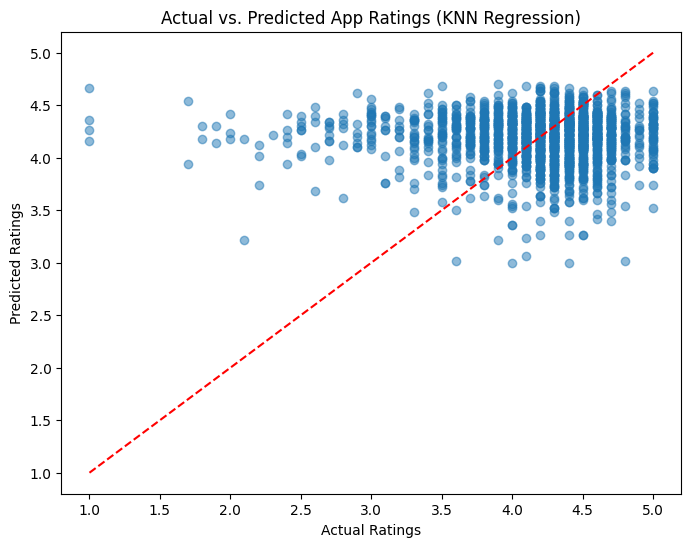

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_predict, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted App Ratings (KNN Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils import resample

n_iterations = 100

train_mse_scores = []
train_mae_scores = []
train_rmse_scores = []
test_mse_scores = []
test_mae_scores = []
test_rmse_scores = []

def root_mean_squared_error(y_true, y_pred):
    """
    Calculate the root mean squared error (RMSE).

    Args:
        y_true: The true values.
        y_pred: The predicted values.

    Returns:
        The RMSE.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

for _ in range(n_iterations):
    x_train_boot, y_train_boot = resample(x_train, y_train, replace=True)

    model_knn = KNeighborsRegressor(n_neighbors=5)
    model_knn.fit(x_train_boot, y_train_boot)
    y_train_predict = model_knn.predict(x_train_boot)
    y_test_predict = model_knn.predict(x_test)
    train_mse_scores.append(mean_squared_error(y_train_boot, y_train_predict))
    train_mae_scores.append(mean_absolute_error(y_train_boot, y_train_predict))
    train_rmse_scores.append(root_mean_squared_error(y_train_boot, y_train_predict))
    test_mse_scores.append(mean_squared_error(y_test, y_test_predict))
    test_mae_scores.append(mean_absolute_error(y_test, y_test_predict))
    test_rmse_scores.append(root_mean_squared_error(y_test, y_test_predict))

print(f"Average Train MSE: {np.mean(train_mse_scores)}")
print(f"Average Train MAE: {np.mean(train_mae_scores)}")
print(f"Average Train RMSE: {np.mean(train_rmse_scores)}")
print()
print(f"Average Test MSE: {np.mean(test_mse_scores)}")
print(f"Average Test MAE: {np.mean(test_mae_scores)}")
print(f"Average Test RMSE: {np.mean(test_rmse_scores)}")

Average Train MSE: 0.15933115544871795
Average Train MAE: 0.27621076388888893
Average Train RMSE: 0.3991206423892995

Average Test MSE: 0.3549072072649572
Average Test MAE: 0.427213782051282
Average Test RMSE: 0.5956861014348686


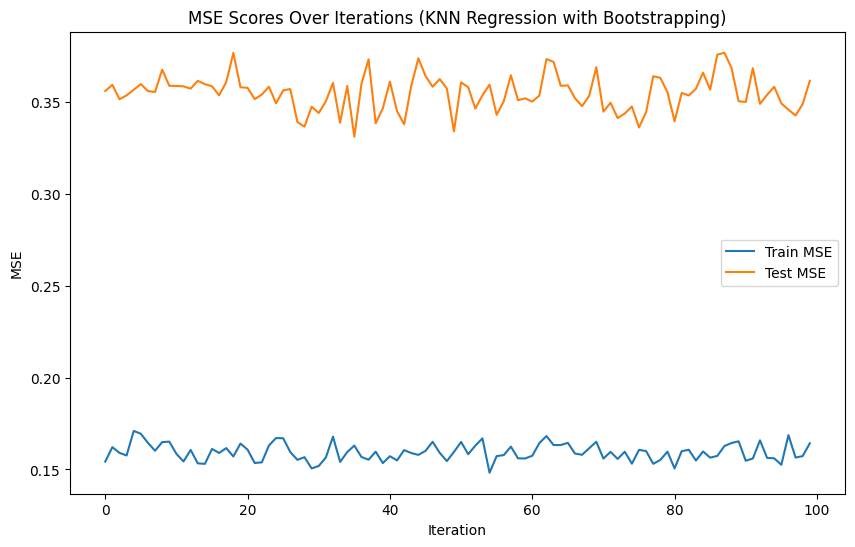

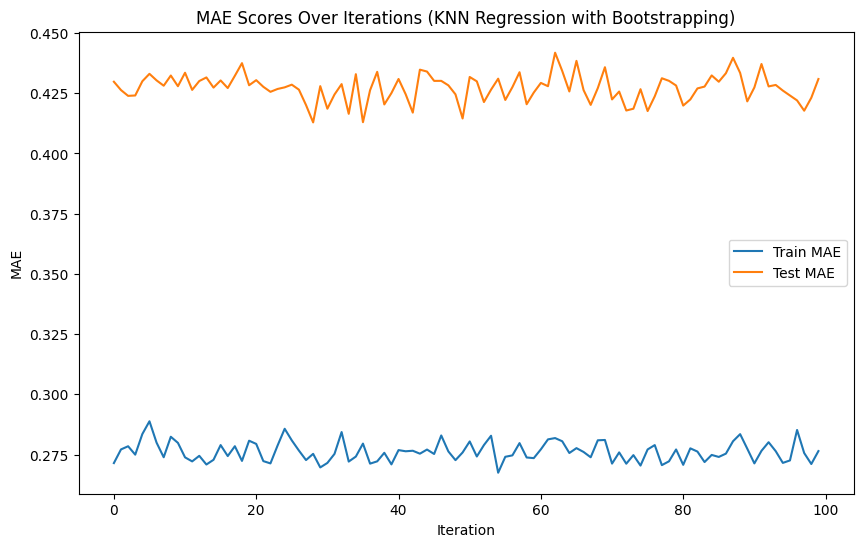

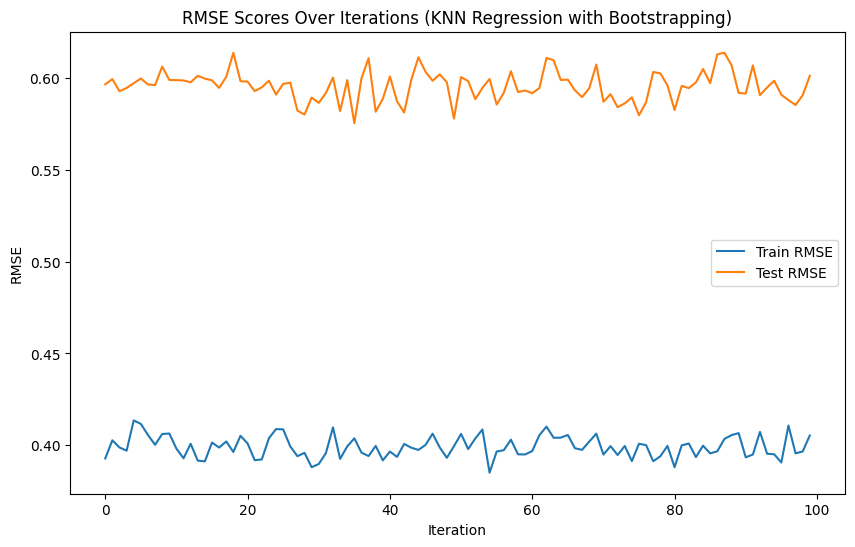

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), train_mse_scores, label='Train MSE')
plt.plot(range(n_iterations), test_mse_scores, label='Test MSE')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE Scores Over Iterations (KNN Regression with Bootstrapping)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), train_mae_scores, label='Train MAE')
plt.plot(range(n_iterations), test_mae_scores, label='Test MAE')
plt.xlabel('Iteration')
plt.ylabel('MAE')
plt.title('MAE Scores Over Iterations (KNN Regression with Bootstrapping)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), train_rmse_scores, label='Train RMSE')
plt.plot(range(n_iterations), test_rmse_scores, label='Test RMSE')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('RMSE Scores Over Iterations (KNN Regression with Bootstrapping)')
plt.legend()
plt.show()

In [ ]:
!pip install scikit-learn
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
pca = PCA(n_components=4)
x_pca = pca.fit_transform(x_scaled)

x_train_pca, x_test_pca, y_train, y_test = train_test_split(
    x_pca, y, test_size=0.2, random_state=42
)

model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(x_train_pca, y_train)
y_pred_train = model_knn.predict(x_train_pca)
y_pred_test = model_knn.predict(x_test_pca)

def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

print(f'train data MSE score: {mean_squared_error(y_train, y_pred_train)}')
print(f'train data MAE score: {mean_absolute_error(y_train, y_pred_train)}')
print(f'train data RMSE score: {root_mean_squared_error(y_train, y_pred_train)}')
print()
print(f'test data MSE score: {mean_squared_error(y_test, y_pred_test)}')
print(f'test data MAE score: {mean_absolute_error(y_test, y_pred_test)}')
print(f'test data RMSE score: {root_mean_squared_error(y_test, y_pred_test)}')

train data MSE score: 0.19279561965811967
train data MAE score: 0.30102029914529915
train data RMSE score: 0.4390849799960364

test data MSE score: 0.2779224358974359
test data MAE score: 0.3615064102564103
test data RMSE score: 0.52718349357452


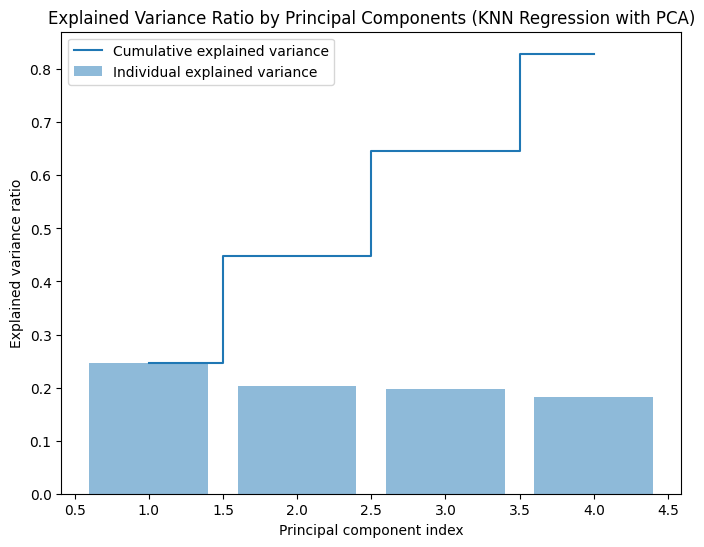

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Explained Variance Ratio by Principal Components (KNN Regression with PCA)')
plt.show()